<a href="https://colab.research.google.com/github/paulbruffett/python_class/blob/master/M05%20-%20Foundations%20of%20Applied%20Data%20Science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Hands-on Introduction to Machine Learning

_"[Machine Learning is a] field of study that gives computers the ability to learn without being explicitly programmed"_ -Arthur Samuel
___
###Types of Machine Learning
There are, broadly, two key types of machine learning, supervised and unsupervised.

*   Supervised machine learning consists of showing computer data and the answer and it learns from that
*   Unsupervised consists of giving the computer data and it finds patterns within the data without being explicitly told what to look for.

We will be seeing examples of supervised learning today, which is, by and large, the most frequently used.
___
###Steps in ML Process
At a high level there are basically 6 steps in a machine learning problem
1. Define the problem
2. Collect data
3. Prepare data
4. Train one of more algorithms
5. Evaluate and optimize algorithm(s)
6. Deploy

___
The dataset we're considering is a canonical dataset in machine learning, the Iris dataset.  We will attempt to classify the species of Iris by measurements from its blossoms.

# Iris dataset
We're going to classify irises by their attributes.

## Exploring the dataset
Using Pandas to plot and explore the data

In [0]:
#we start by importing sklearn and loading the dataset
from sklearn.datasets import load_iris
import pandas as pd
data = load_iris()

Features are the data attributes that we use to make a prediction, in this case features are the measurements from each of the iris species.  Features are frequently noted as 'X'.

The label is the thing we're trying to predict, in this case the species of iris.  Labels are frequently noted as 'y'.  

In [0]:
#setting our features and targets.
X = data.data
y = data.target

In [3]:
X_df = pd.DataFrame(X,columns=data.feature_names)
X_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [4]:
X_df['target'] = y.reshape(-1,1)
X_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


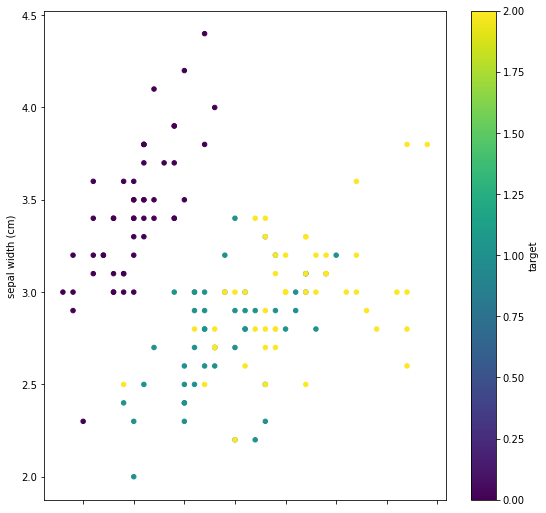

In [5]:
X_df.plot(x='sepal length (cm)', y='sepal width (cm)', c='target', kind='scatter',colormap='viridis',figsize=(9,9))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f48f3a49cf8>,
      dtype=object)

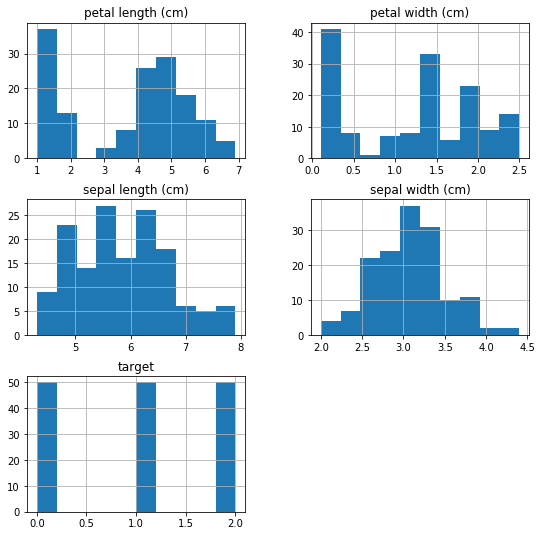

In [6]:
X_df.hist(figsize=(9,9))

## Building a model
We'll use a classifier model to predict which species of iris it is.

In [0]:
#import some more libraries to split the data and import our model type.
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In order evaluate our model's accuracy, we have to hold out some of the data.  This means we make a training dataset, from which the model learns, and a validation or test dataset, which the model never sees and, thus, can be used to accurately evaluate the model's performance.

If data is not held out some algorithms, especially very powerful ones, can 'overfit' the data, memorize patterns in the data that are not true signal and, thereby, do poorly when shown real-world datasets.

In [0]:
#train test split randomly splits the dataset into a training dataset and a test, it holds out about 20% of the data for test by default
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [9]:
#we initialize the model and fit it to the training data
model = DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [10]:
#we score the model against the test dataset
model.score(X_test,y_test)

0.9473684210526315

In [11]:
#a confusion matrix allows us to see what mistakes the model made, specifically
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,model.predict(X_test))

array([[16,  0,  0],
       [ 0,  6,  1],
       [ 0,  1, 14]])

#Housing Example
Let's look at another example, this time a regression problem rather than classification.  We will do a bit more data preprocessing and evaluate two different models.

In [0]:
from sklearn.datasets import load_boston
data = load_boston()
X = data.data
y = data.target

## Exploring the dataset
So it's important and frequently neglected to explore data you're performing machine learning or analytics on.  Getting a better understanding of what the columns look like, what kinds of values they contain and the distribution of the data helps you understand your algorithm.

We will use the pandas library, a very popular tabular data processing library to explore the data a bit.

In [13]:
data.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [14]:
data.DESCR

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f48f01f7b70>,
      dtype=object)

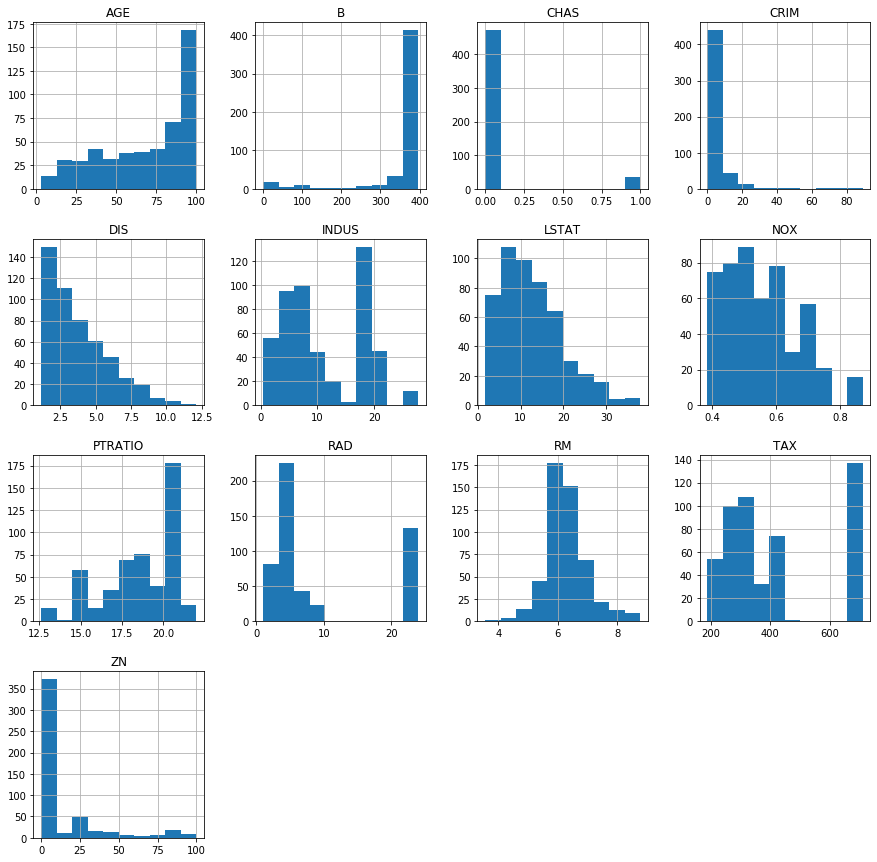

In [15]:
features = pd.DataFrame(X,columns=data.feature_names)
features.hist(figsize=(15,15))

We will scale the data, which centers the data and normalizes it around one unit of standard deviation.

## Data prep
Let's experiment with scaling and filling null values before running the data through a model.

In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [0]:
#splitting the data
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [0]:
#I can reuse the scaler on as many datasets as I need to ensure consistency
scaler = StandardScaler()
scaler.fit(data.data)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f48efb805f8>,
      dtype=object)

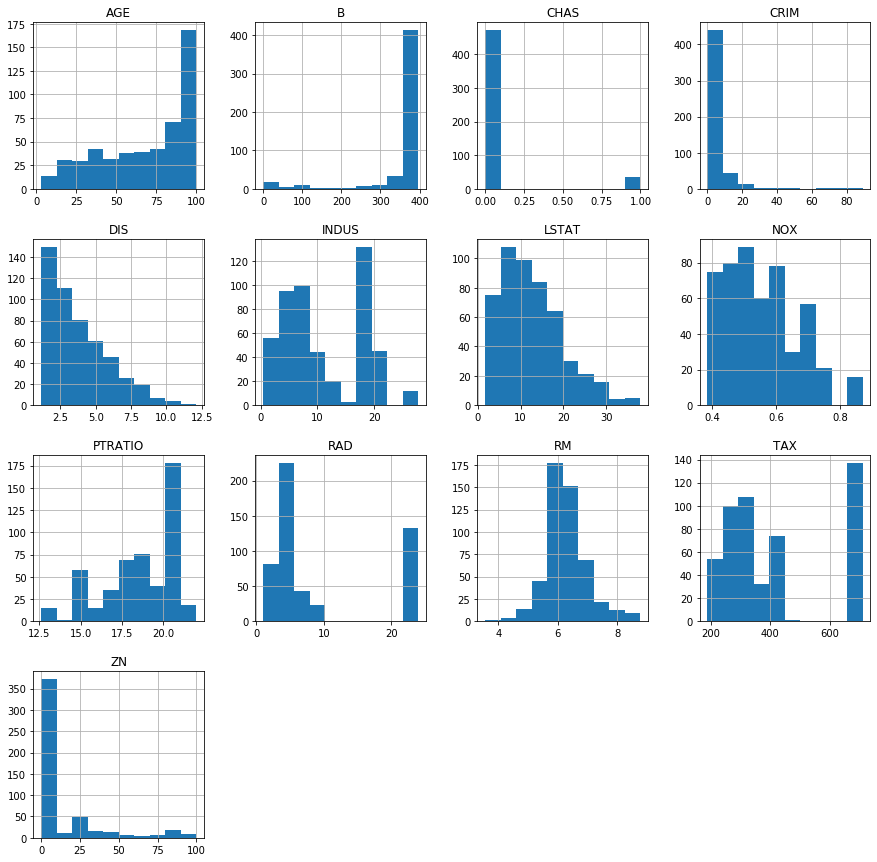

In [19]:
pd.DataFrame(X,columns=data.feature_names).hist(figsize=(15,15))

In [20]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


## Building a model

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor 

In [0]:
linreg = LinearRegression()
decreg = DecisionTreeRegressor()

In [0]:
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [24]:
linreg.fit(X_train,y_train)
linreg.score(X_test,y_test)

0.7602434696553519

In [25]:
decreg.fit(X_train,y_train)
decreg.score(X_test,y_test)

0.8238904309918283

In [0]:
y_linreg = linreg.predict(X_test)
y_decreg = decreg.predict(X_test)

In [0]:
predictions = pd.DataFrame(y_test.reshape(-1,1),columns=['y'])

In [0]:
predictions['y_linreg'] = y_linreg.reshape(-1,1)
predictions['y_decreg'] = y_decreg.reshape(-1,1)

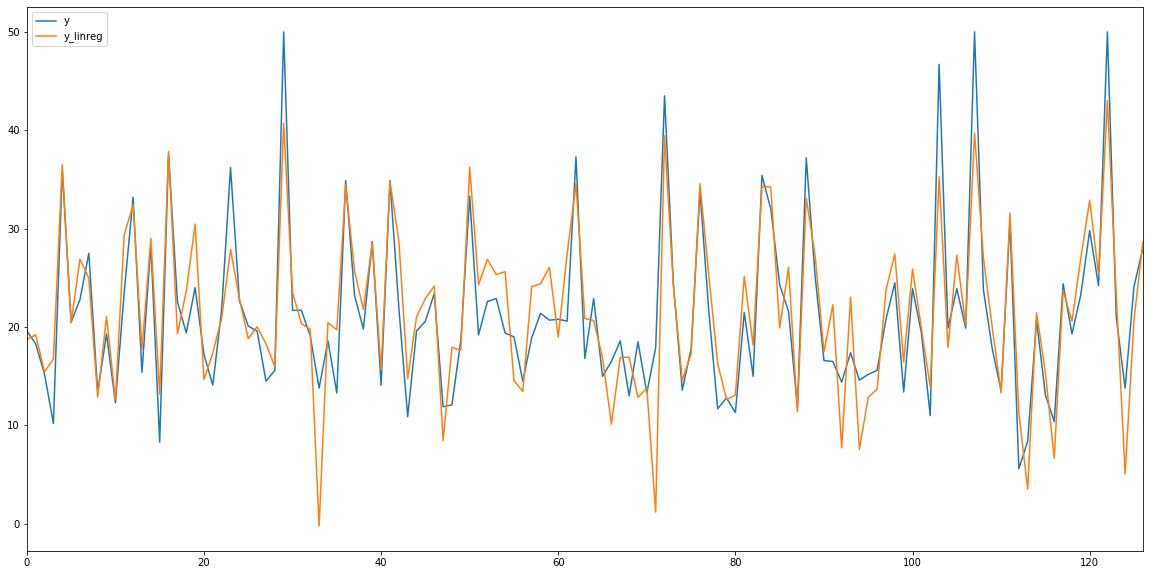

In [29]:
predictions[['y','y_linreg']].plot(figsize=(20,10))

# More Complex : Income data
We will have to deal with categorical, textual data.  Algorithms can't usually use this data without preprocessing.

In [0]:
col_names = ['age','workclass','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','fnlwgt']
train = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data',names=col_names,header=None,index_col=2)
test = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test', header=None, skiprows=1,names=col_names, index_col=2)

In [64]:
train

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,fnlwgt
77516,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
83311,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
215646,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
234721,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
338409,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257302,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
154374,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
151910,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
201490,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [65]:
test

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,fnlwgt
226802,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
89814,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
336951,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
160323,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
103497,18,?,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215419,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
321403,64,?,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K.
374983,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
83891,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [66]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32561 entries, 77516 to 287927
Data columns (total 14 columns):
age               32561 non-null int64
workclass         32561 non-null object
education         32561 non-null object
education-num     32561 non-null int64
marital-status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
native-country    32561 non-null object
fnlwgt            32561 non-null object
dtypes: int64(5), object(9)
memory usage: 3.7+ MB


In [0]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()

In [68]:
model.fit(train.drop(columns='fnlwgt'),train['fnlwgt'])

ValueError: ignored

## Data encoding
We get an error because the model expects all data to be numeric, we can't pass strings to most machine learning models and so need to convert these values into integers using a label encoder.

In [69]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
#double brackets is important, otherwise you'll get an error because it creates a Series object
workclass = train[['workclass']]
oe.fit_transform(workclass)

array([[7.],
       [6.],
       [4.],
       ...,
       [4.],
       [4.],
       [5.]])

In [70]:
oe.categories_

[array([' ?', ' Federal-gov', ' Local-gov', ' Never-worked', ' Private',
        ' Self-emp-inc', ' Self-emp-not-inc', ' State-gov', ' Without-pay'],
       dtype=object)]

In [0]:
#split out the label
y_train = train['fnlwgt']
X_train = train.drop(columns='fnlwgt')
y_test = test['fnlwgt']
X_test = test.drop(columns='fnlwgt')

In [74]:
y_test

226802     <=50K.
89814      <=50K.
336951      >50K.
160323      >50K.
103497     <=50K.
           ...   
215419     <=50K.
321403     <=50K.
374983     <=50K.
83891      <=50K.
182148      >50K.
Name: fnlwgt, Length: 16281, dtype: object

In [0]:
categorical = []
numeric = []
for i in X_train.columns:
  col_type = X_train[i].dtype
  if col_type == 'object':
    categorical.append(i)
  else:
    numeric.append(i)

In [76]:
categorical

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country']

In [77]:
numeric

['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

In [78]:
oe.fit_transform(X_train[categorical])

array([[ 7.,  9.,  4., ...,  4.,  1., 39.],
       [ 6.,  9.,  2., ...,  4.,  1., 39.],
       [ 4., 11.,  0., ...,  4.,  1., 39.],
       ...,
       [ 4., 11.,  6., ...,  4.,  0., 39.],
       [ 4., 11.,  4., ...,  4.,  1., 39.],
       [ 5., 11.,  2., ...,  4.,  0., 39.]])

## Pipelines
Pipelines allow us to construct multi-step data preprocessing workflows and apply them.  Some data science use cases have 3 sets of data; train, test, validation.  With a pipeline we can apply complex transforms consistently and deploy the entire pipeline for inferencing.

In [0]:
from sklearn.pipeline import Pipeline
numeric_pipeline = Pipeline([
        ('imputer', SimpleImputer()),
        ('std_scaler', StandardScaler()),
    ])

categorical_pipeline = Pipeline([('encoder', OrdinalEncoder())])

In [80]:
numeric_pipeline.fit_transform(X_train[numeric])

array([[ 0.03067056,  1.13473876,  0.1484529 , -0.21665953, -0.03542945],
       [ 0.83710898,  1.13473876, -0.14592048, -0.21665953, -2.22215312],
       [-0.04264203, -0.42005962, -0.14592048, -0.21665953, -0.03542945],
       ...,
       [ 1.42360965, -0.42005962, -0.14592048, -0.21665953, -0.03542945],
       [-1.21564337, -0.42005962, -0.14592048, -0.21665953, -1.65522476],
       [ 0.98373415, -0.42005962,  1.88842434, -0.21665953, -0.03542945]])

In [0]:
from sklearn.compose import ColumnTransformer


pipeline = ColumnTransformer([
        ("numeric", numeric_pipeline, numeric),
        ("categorical", categorical_pipeline, categorical),
    ])



In [82]:
pipeline.fit_transform(X_train)

array([[ 3.06705574e-02,  1.13473876e+00,  1.48452895e-01, ...,
         4.00000000e+00,  1.00000000e+00,  3.90000000e+01],
       [ 8.37108980e-01,  1.13473876e+00, -1.45920484e-01, ...,
         4.00000000e+00,  1.00000000e+00,  3.90000000e+01],
       [-4.26420266e-02, -4.20059624e-01, -1.45920484e-01, ...,
         4.00000000e+00,  1.00000000e+00,  3.90000000e+01],
       ...,
       [ 1.42360965e+00, -4.20059624e-01, -1.45920484e-01, ...,
         4.00000000e+00,  0.00000000e+00,  3.90000000e+01],
       [-1.21564337e+00, -4.20059624e-01, -1.45920484e-01, ...,
         4.00000000e+00,  1.00000000e+00,  3.90000000e+01],
       [ 9.83734148e-01, -4.20059624e-01,  1.88842434e+00, ...,
         4.00000000e+00,  0.00000000e+00,  3.90000000e+01]])

In [0]:
#only fit on training, transform test - this keeps your categorical encodings consistent, which is obviously important!
X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

## It's not supposed to be this hard
We have to encode the targets too, just like the features need to be numeric, the targets need to be numeric, right now they're strings.  This is a binary classification; over or equal to $50k or under $50k, so it'll map to 1 or 0.
Let's manually map the values so it'll work like it's supposed to with a LabelEncoder.

In [84]:
y_train

77516      <=50K
83311      <=50K
215646     <=50K
234721     <=50K
338409     <=50K
           ...  
257302     <=50K
154374      >50K
151910     <=50K
201490     <=50K
287927      >50K
Name: fnlwgt, Length: 32561, dtype: object

In [85]:
#why in the devil do these have periods?
y_test

226802     <=50K.
89814      <=50K.
336951      >50K.
160323      >50K.
103497     <=50K.
           ...   
215419     <=50K.
321403     <=50K.
374983     <=50K.
83891      <=50K.
182148      >50K.
Name: fnlwgt, Length: 16281, dtype: object

In [86]:
# a lambda is an anonymous function, apply runs the function over the entire dataset, we're just trimming the string
y_test.apply(lambda x: x[:-1])

226802     <=50K
89814      <=50K
336951      >50K
160323      >50K
103497     <=50K
           ...  
215419     <=50K
321403     <=50K
374983     <=50K
83891      <=50K
182148      >50K
Name: fnlwgt, Length: 16281, dtype: object

In [0]:
y_test = y_test.apply(lambda x: x[:-1])

In [0]:
#now this works
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [91]:
model = AdaBoostClassifier()
model.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [94]:
model.score(X_test,y_test)

0.8584853510226644

In [95]:
from lightgbm import LGBMClassifier
lgb = LGBMClassifier()
lgb.fit(X_train,y_train)
lgb.score(X_test,y_test)

0.8727965112708065

## Ok, now let's try one hot encoding
This creates a sparse array of the encodings.  Not so useful for decision trees, very useful for neural nets.

In [0]:
from sklearn.preprocessing import OneHotEncoder

categorical_pipeline = Pipeline([('encoder', OrdinalEncoder()),
                                 ('ohe', OneHotEncoder())])

pipeline = ColumnTransformer([
        ("numeric", numeric_pipeline, numeric),
        ("categorical", categorical_pipeline, categorical),
    ])



In [0]:
X_train_w = train.drop(columns='fnlwgt')
X_test_w = test.drop(columns='fnlwgt')
X_train_w = pipeline.fit_transform(X_train_w)
X_test_w = pipeline.transform(X_test_w)

In [100]:
X_train.shape

(32561, 13)

In [101]:
X_train_w.shape

(32561, 107)

In [102]:
from lightgbm import LGBMClassifier
lgb = LGBMClassifier()
lgb.fit(X_train_w,y_train)
lgb.score(X_test_w,y_test)

0.8733493028683742